In [1]:
import pandas as pd 

main_df = pd.read_csv("main-df.csv")

In [2]:
main_df = main_df[~(main_df["GEOID"]== "17031839100")]

In [3]:
X = main_df[["Pickups","MedianIncome","TotalPopulation","Population_Density"," Employment_Density","Percent_Zero_Car_Ownership","LandUse_Diversity","Distance_from_transit","Trip_Miles","Trip_Seconds"]]

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
sc_X = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_sc_X = pca.fit_transform(sc_X)

In [6]:
from minisom import MiniSom
import numpy as np

from sklearn.model_selection import ParameterGrid

param_grid = {
    'x': [2, 3, 4, 5, 10],
    'y': [2, 3, 4, 5, 10]
}

best_quantization_error = float('inf')
best_som = None

# Iterate over the parameter grid
for params in ParameterGrid(param_grid):
    x, y = params['x'], params['y']
    
    # Create and train the SOM
    som = MiniSom(x, y, sc_X.shape[1], sigma=1.0, learning_rate=0.5)
    som.train_batch(sc_X, 10000)
    
    # Evaluate the SOM using a metric (quantization error in this example)
    quantization_error = som.quantization_error(sc_X)
    
    # Check if this model has the lowest quantization error
    if quantization_error < best_quantization_error:
        best_quantization_error = quantization_error
        best_som = som
        best_params = params

print("Best SOM Parameters:", best_params)
print("Best Quantization Error:", best_quantization_error)


Best SOM Parameters: {'x': 10, 'y': 10}
Best Quantization Error: 0.985373032031413


Text(0, 0.5, 'Quantization Error')

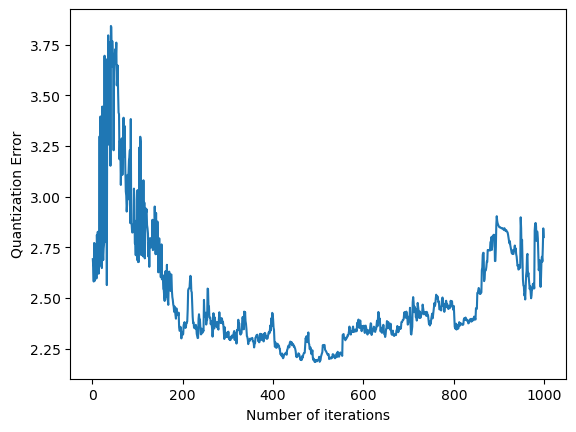

In [7]:
import matplotlib.pyplot as plt
topographic_error = []
for i in range(1,1000):
    som = MiniSom(2,2,sc_X.shape[1], sigma = 0.5, learning_rate=0.5)
    som.train_batch(sc_X,i)
    topographic_error.append(som.quantization_error(sc_X))
plt.plot(list(range(1,1000)),topographic_error)
plt.xlabel("Number of iterations")
plt.ylabel("Quantization Error")

In [8]:
som_main = MiniSom(14,10,sc_X.shape[1], sigma = 0.1, learning_rate=0.1)
som_main.train_batch(sc_X, 500,verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 1.6310632277917891


In [9]:
som_main.get_weights().shape

(14, 10, 10)

In [10]:
winner_coordinates = np.array([som_main.winner(x) for x in sc_X]).T

In [11]:
winner_coordinates

array([[ 1,  1,  1, ..., 11,  6,  2],
       [ 5,  5,  5, ...,  3,  6,  3]])

In [12]:
cluster_index = np.ravel_multi_index(winner_coordinates, (14,2))

ValueError: invalid entry in coordinates array

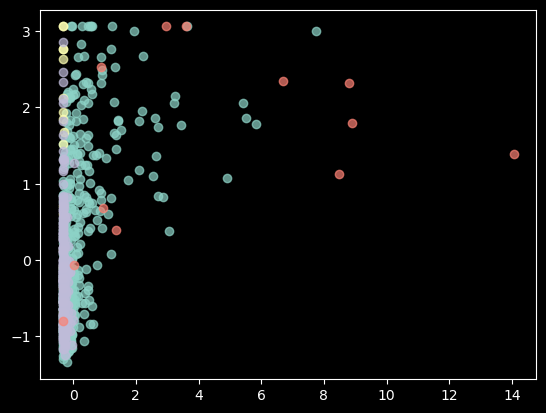

In [ ]:
for c in np.unique(cluster_index):
    plt.scatter(sc_X[cluster_index == c, 0],
                sc_X[cluster_index == c, 1], label = "cluster"+str(c), alpha = 0.7
                )

In [15]:
cluster_index

NameError: name 'cluster_index' is not defined

In [ ]:
X.shape

(895, 10)

In [ ]:
X_with_cluster = X.assign(cluster = cluster_index)

In [ ]:
X_with_cluster.to_csv("X-with-cluster.csv")

<Axes: ylabel='cluster'>

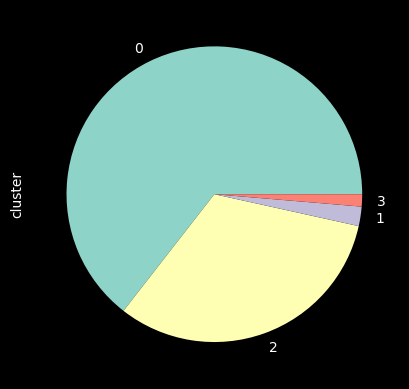

In [ ]:
X_with_cluster.cluster.value_counts().plot(kind="pie")

In [ ]:
cluster_index.shape

(895,)

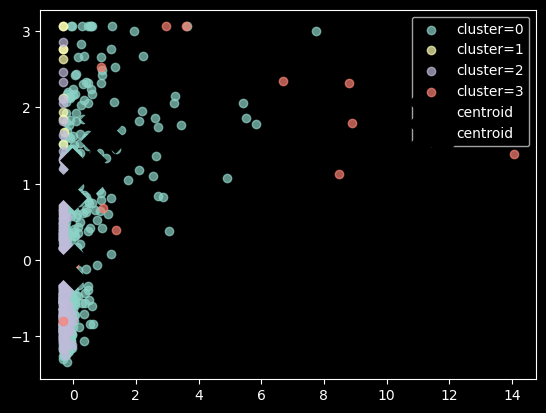

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(sc_X[cluster_index == c, 0],
                sc_X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=35, color='k', label='centroid')
plt.legend();

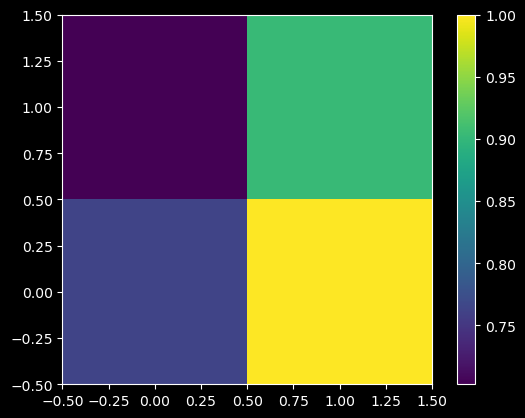

In [ ]:
u_matrix = som.distance_map()
import matplotlib.pyplot as plt 
plt.imshow(u_matrix, cmap="viridis", origin="lower")
plt.colorbar()
plt.show()

In [ ]:
positions = som.get_weights()

In [ ]:
positions.shape

(2, 2, 10)

In [ ]:
positions[0,0,:]

array([ 0.32302775,  1.17299718,  0.19128563,  0.82777364,  0.04581527,
        0.4763196 , -0.07413269, -0.32010296, -0.85809521, -0.98130311])

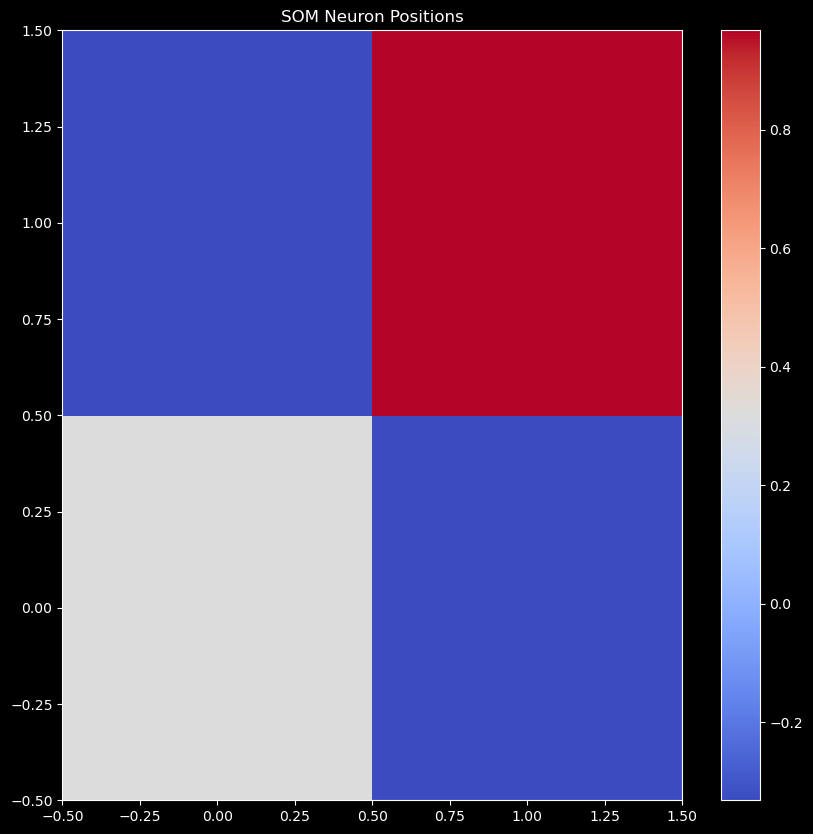

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'positions' contains the neuron positions obtained from MiniSom

# Create a heatmap of the neuron positions
plt.figure(figsize=(10, 10))
plt.pcolor(np.arange(positions.shape[0]), np.arange(positions.shape[1]), positions[:,:,0], cmap='coolwarm')  # Use the first dimension of the positions array
plt.colorbar()

plt.title('SOM Neuron Positions')
plt.show()


In [ ]:
som.quantization_error(sc_X)

2.80036745297378

Text(0.5, 1.0, 'PCA onto two dimensions of the scaled data')

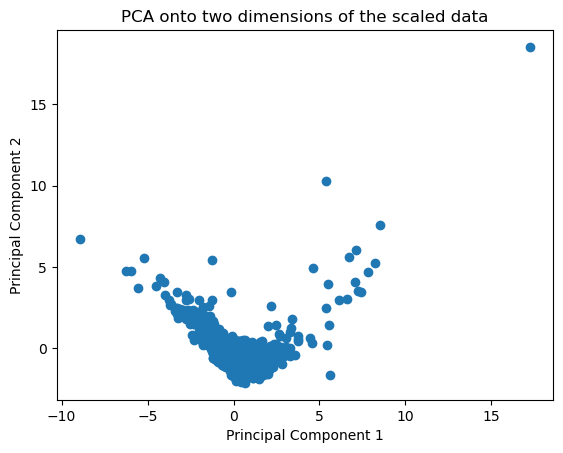

In [13]:
plt.scatter(pca_sc_X[:,0],pca_sc_X[:,1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA onto two dimensions of the scaled data")

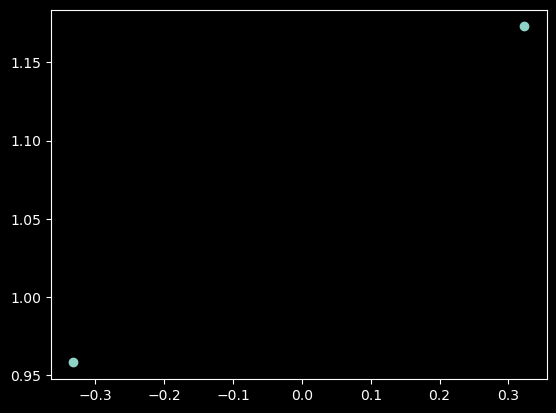

In [ ]:
plt.scatter(positions[0,:,0],positions[0,:,1])

In [ ]:
positions.shape

(2, 2, 10)

In [ ]:
pca_sc_X.shape

(895, 2)

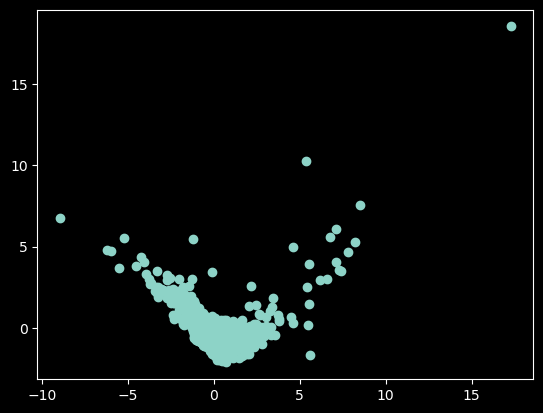

In [ ]:
plt.scatter(pca_sc_X[:,0],pca_sc_X[:,1])

In [ ]:
winner_coordinates

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 0, 0]])

In [ ]:
np.unique(cluster_index)

array([0, 1, 2, 3])

In [ ]:
pca_sc_X[0,0]

17.282983973445713

In [ ]:
som_weights = som.get_weights()

In [ ]:
for i in som.get_weights():
    print(i[:,0])

[ 0.32302775 -0.33221431]
[-0.33227719  0.96818127]


In [ ]:
som_weights[0,0,:]

array([ 0.32302775,  1.17299718,  0.19128563,  0.82777364,  0.04581527,
        0.4763196 , -0.07413269, -0.32010296, -0.85809521, -0.98130311])

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(pca_sc_X[cluster_index == c, 0],
                pca_sc_X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
#plt.scatter(pca_sc_cluster_coordinates[:,0],pca_sc_cluster_coordinates[:,1], marker='x', color = "red")

plt.legend()
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters as projected onto two dimensions")

NameError: name 'cluster_index' is not defined

In [ ]:
som.get_weights().shape


(2, 2, 10)

In [ ]:
pca = PCA(n_components=2)
scaler = StandardScaler()

In [ ]:
pca_sc_X_with_clusters = pca.fit_transform(scaler.fit_transform(X_with_cluster))

In [ ]:
pca_sc_X_with_clusters.shape

(895, 2)

In [ ]:
np.ravel(som.get_weights()).shape

(40,)

In [ ]:
cluster_coordinates = np.array([som_weights[0,0,:],som_weights[0,1,:],som_weights[1,0,:],som_weights[1,1,:]])

In [ ]:
cluster_coordinates.shape

(4, 10)

In [ ]:
pca_sc_cluster_coordinates = pca.fit_transform(scaler.fit_transform(cluster_coordinates))

In [ ]:
pca_sc_cluster_coordinates

array([[ 1.63177236,  1.60488007],
       [-2.57155429,  0.95152366],
       [-2.71707684, -1.43969186],
       [ 3.65685876, -1.11671187]])

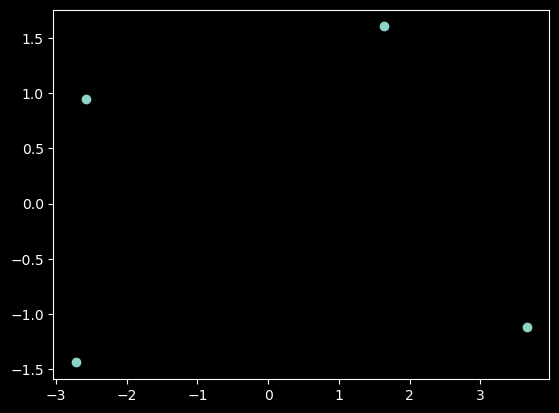

In [ ]:
plt.scatter(pca_sc_cluster_coordinates[:,0],pca_sc_cluster_coordinates[:,1])

In [ ]:
X_with_cluster_groupby = X_with_cluster.groupby("cluster").mean()

In [ ]:
X_with_cluster_groupby

,Pickups,MedianIncome,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity,Distance_from_transit,Trip_Miles,Trip_Seconds
cluster,,,,,,,,,,
0,31765.885615,85900.493934,3385.093588,38.185717,10.308518,0.244521,0.824956,233.538478,5.797611,1000.290215
1,297.263158,149221.315789,4601.578947,10.272762,10.465472,0.101122,3.175389,457.476149,17.542535,1961.039958
2,2929.275261,73009.703833,4206.780488,18.320666,3.423521,0.141682,1.018148,362.257844,8.466476,1249.391233
3,406730.166667,164795.250000,4237.083333,31.013539,258.614703,0.192708,45.003452,208.357014,6.146520,951.360888
